# TRABAJO PRÁCTICO 1: Análisis Exploratorio de Datos

## Análisis realizado
- ### Clicks
    - [Click's_por_hora](#link_1)
    - [Posicion_click's](#link_2)
    - [Cantidad_de_clicks_por_tiempo_de_click](#link_11)
    - [Publicidades_con_mas_clicks](#link_18)
    - [Ubicacion geografica](#link_20)
- ### Installs
    - [Instalaciones_atribuidas_Jampp](#link_3)
    - [Tipos_instalaciones](#link_4)
    - [Horario_instalaciones](#link_5)
    - [Análisis_aplicación](#link_6)
    - [Instalaciones_wifi](#link_7)
    - [Instalaciones_por_IP](#link_10)
    - [Publicidades_con_mas_instalaciones](#link_19)
- ### Auctions
    - [Cantidad_subastas_por_dispositivo](#link_8)
    - [Subastas_por_hora](#link_9)
- ### Events
    - [Publicidades_Google_vs_Apple](#link_13)
    - [Version_SO_y_Eventos](#link_12)
    - [Horarios_Eventos](#link_14)
    - [Atribuciones_Jampp_eventos](#link_15)
    - [Ciudades_con_mas_Eventos](#link_16)
    - [Comparacion_Ciudades_mas_eventos](#link_17)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import numpy as np

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importo los dataframes ya limpios utilizando los otros notebooks
#Los dataframes se van a llamar: clicks,auctions,installs y events
%run Limpieza_Clicks.ipynb
%run Limpieza_Auctions.ipynb
%run Limpieza_Installs.ipynb
%run Limpieza_Events.ipynb

In [3]:
clicks.head()

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1,iGgClCM9exiHF4K31g94XmvHEBSLKIY,inf,NaN,inf,2733035977666442898,-1,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,inf,NaN,inf,392184377613098015,-1,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,inf,NaN,inf,392184377613098015,-1,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,inf,NaN,inf,2733035977666442898,-1,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,inf,NaN,inf,2733035977666442898,-1,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [4]:
auctions.head()

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,ip_address,device_language,Wifi_cat
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,5529284367937637301,NaN,Sin Definir
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,6098022721363533304,NaN,Sin Definir
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,4636407223847323867,3.301378e+18,Sin Definir
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,4636407223847323867,NaN,Sin Definir
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,685400811232710215,3.301378e+18,Sin Definir


In [6]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,user_agent,event_uuid,carrier,kind,device_os,connection_type,ip_address,device_language,Wifi_cat
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,Cable/DSL,7858558567428669000,4.077062e+17,Sin Definir
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,Cable/DSL,7858558567428669000,4.077062e+17,Sin Definir
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,Cable/DSL,7858558567428669000,4.077062e+17,Sin Definir
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,Cable/DSL,6324037615828123965,4.077062e+17,Sin Definir
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,7.164321e+18,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,Cable/DSL,2894495631302821483,3.301378e+18,Sin Definir


## Exploracion De Datos

<a id='link_1'></a>
### Cantidad de clicks realizados dependiendo de la hora

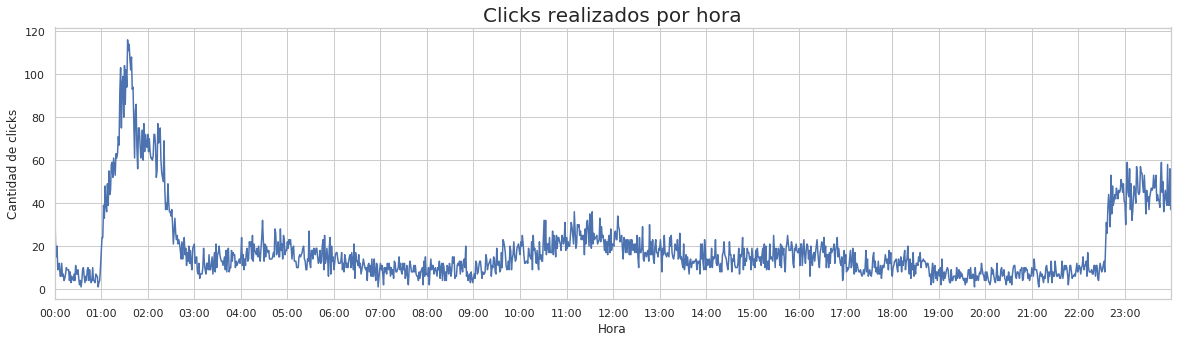

In [7]:
clicks['created'].dt.round("min").dt.time.value_counts().sort_index().plot(kind='line',figsize=(20,5), grid=True);
horas = [datetime.time(i) for i in range(24)]
plt.title("Clicks realizados por hora", size=20);
plt.xticks(horas);
plt.xlabel("Hora");
plt.ylabel("Cantidad de clicks");

### Cantidad de eventos por tipo de conexión

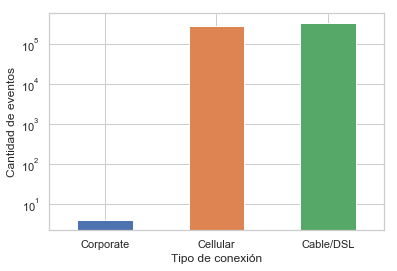

In [8]:
g = events['connection_type'].value_counts().sort_values().plot(logy=True,kind='bar',rot=0);
g.set_xlabel("Tipo de conexión", fontsize=12);
g.set_ylabel("Cantidad de eventos", fontsize=12);

<a id='link_2'></a>
### En que posicion se realizan la mayor cantidad de clicks

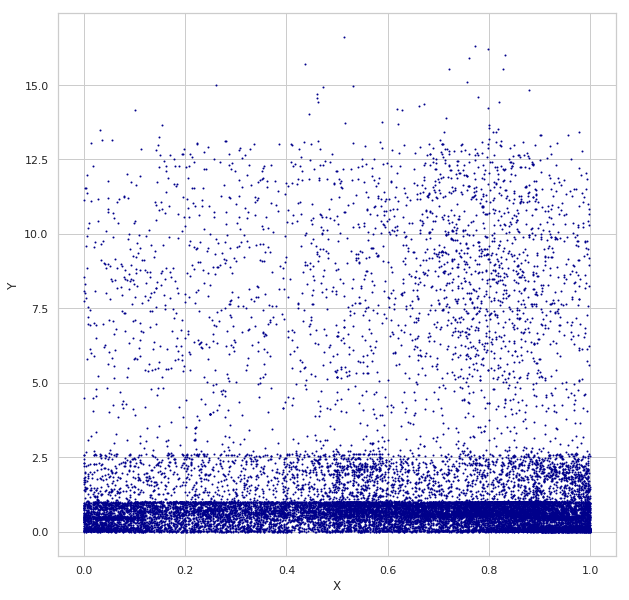

In [9]:
g = clicks.plot.scatter('touchX','touchY',s=1,c='DarkBlue', figsize=(10,10));
g.set_xlabel("X", fontsize=12);
g.set_ylabel("Y", fontsize=12);

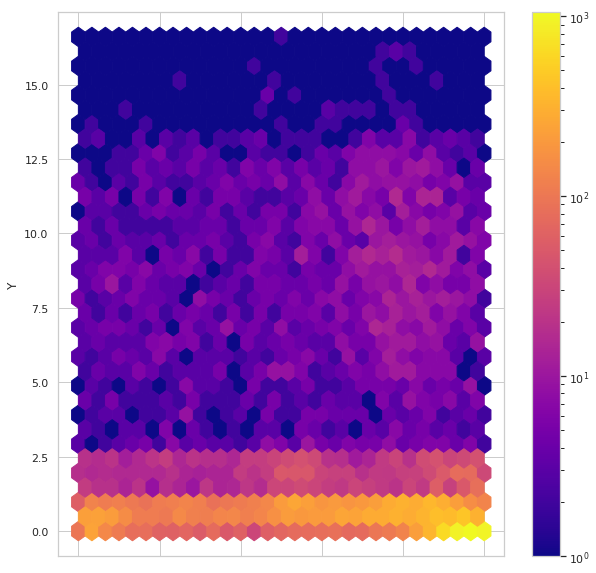

In [10]:
g = clicks.plot.hexbin('touchX','touchY', gridsize=30, figsize=(10,10),cmap="plasma",bins='log');
g.set_xlabel("X", fontsize=12);
g.set_ylabel("Y", fontsize=12);

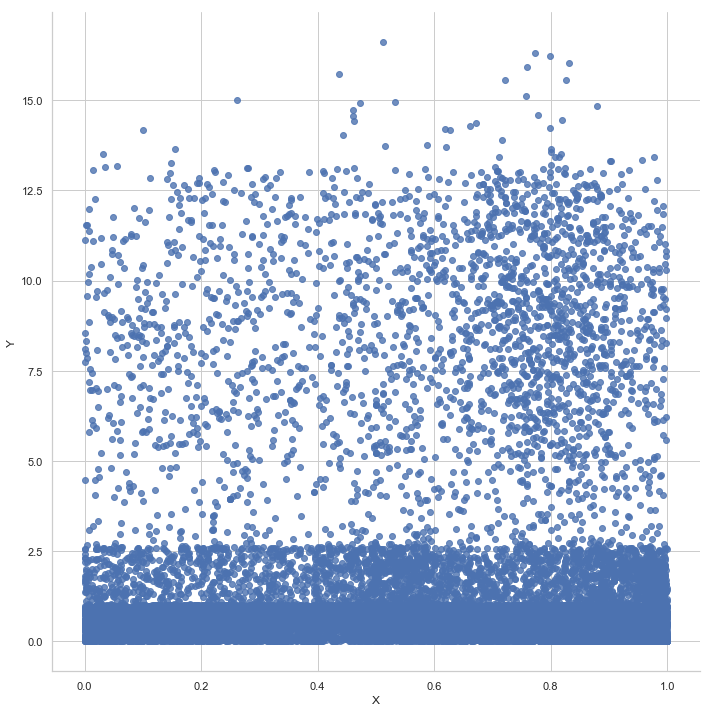

In [13]:
g = sns.lmplot(x="touchX",y="touchY",data=clicks,fit_reg=False, height=10)
g = g.set_axis_labels("X", "Y")

<a id='link_20'></a>
### Ubicacion geografica de clicks

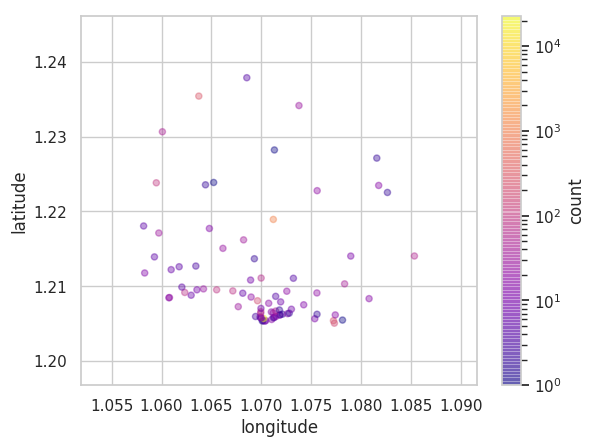

In [76]:
lat_long_count = clicks.groupby(['latitude','longitude']).agg({"ref_hash":["count"]})
lat_long_count.columns = ['count']
lat_long_count.reset_index().plot.scatter(x="longitude",y="latitude", c='count',norm=clr.LogNorm(), cmap='plasma', alpha=0.4)


<a id='link_3'></a>
### Que instalaciones se registran gracias a Jampp

In [12]:
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [13]:
installs.shape

(3412, 16)

<b>Resultado:</b> El set de datos dado, no contiene instalaciones que Jampp se las atribuya.

<a id='link_4'></a>
### Tipos de instalaciones

In [14]:
installs['kind'].fillna(value='without_kind',inplace=True)

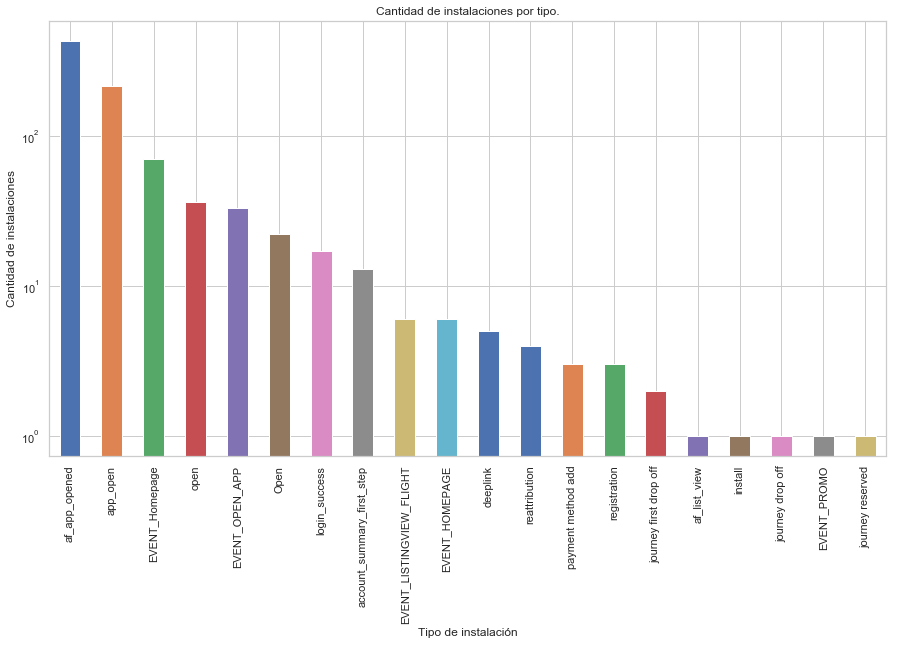

In [14]:
g=installs.groupby('kind').size().sort_values(ascending=False).plot(figsize=(15,8),kind='bar',rot=90,\
                                                            logy=True,\
                                                            title='Cantidad de instalaciones por tipo.');
g.set_xlabel('Tipo de instalación');
g.set_ylabel('Cantidad de instalaciones');

Segun el json dado, kind es el tipo de instalacion, pero por los nombres que se leen, parece mas a tipos de eventos.. conclusion????????

<a id='link_5'></a>
### Horario de las instalaciones

In [15]:
installs['Week_day'] = installs['created'].dt.day_name().astype('category')
installs['Year'] = installs['created'].dt.year.astype('category')
installs['Month'] = installs['created'].dt.month.astype('category')
installs['Hour'] = installs['created'].dt.hour.astype('int8')

In [16]:
df = installs[['Week_day','Hour']].groupby(['Week_day','Hour']).size().reset_index(name='cantidad')\
    .set_index('Week_day')

df = df.pivot_table(values='cantidad', index=df.index, columns='Hour').fillna(value=0).astype('int8')

In [17]:
df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Friday,33,14,12,13,6,3,2,3,4,2,...,20,20,21,21,20,23,18,22,23,26
Monday,17,28,28,9,15,3,1,0,2,3,...,17,32,15,25,22,14,24,28,34,18
Saturday,17,25,19,14,10,5,5,4,4,2,...,15,26,16,28,24,26,20,20,18,20
Sunday,23,18,26,12,3,4,4,2,5,0,...,29,17,25,23,20,24,25,15,26,14
Thursday,24,20,16,16,8,5,1,1,2,7,...,20,29,19,35,13,34,16,21,24,15


In [9]:
days = {'Week_day': ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]}
days = pd.DataFrame(data=days)
df = pd.merge(days, df, on='Week_day', how='left')
df = df.set_index('Week_day')

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Monday,17,28,28,9,15,3,1,0,2,3,...,17,32,15,25,22,14,24,28,34,18
Tuesday,42,42,38,22,13,9,5,8,7,7,...,58,46,54,49,39,55,42,43,56,62
Wednesday,42,44,35,29,21,9,0,3,4,6,...,42,50,36,52,32,35,43,49,48,57
Thursday,24,20,16,16,8,5,1,1,2,7,...,20,29,19,35,13,34,16,21,24,15
Friday,33,14,12,13,6,3,2,3,4,2,...,20,20,21,21,20,23,18,22,23,26


Ahora esta ordenado en dias de la semana

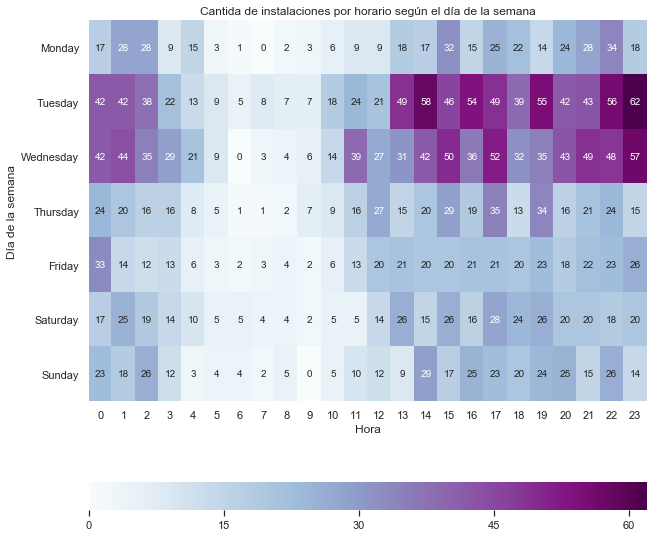

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df,ax=ax,cmap="BuPu",cbar_kws={"orientation": "horizontal"},annot=True);
plt.yticks(rotation=0);
plt.xlabel('Hora');
plt.ylabel('Día de la semana');
plt.title('Cantida de instalaciones por horario según el día de la semana');

In [22]:
installs['Month'].value_counts()

3    3412
Name: Month, dtype: int64

<b>Nota:</b> En el set de datos dado, solo se tiene información del mes de Marzo.

In [23]:
installs['Year'].value_counts()

2019    3412
Name: Year, dtype: int64

<b>Nota:</b> En el set de datos dado, solo se tiene información del mes de Marzo y del año 2019.

In [21]:
del installs['Year']
del installs['Month']

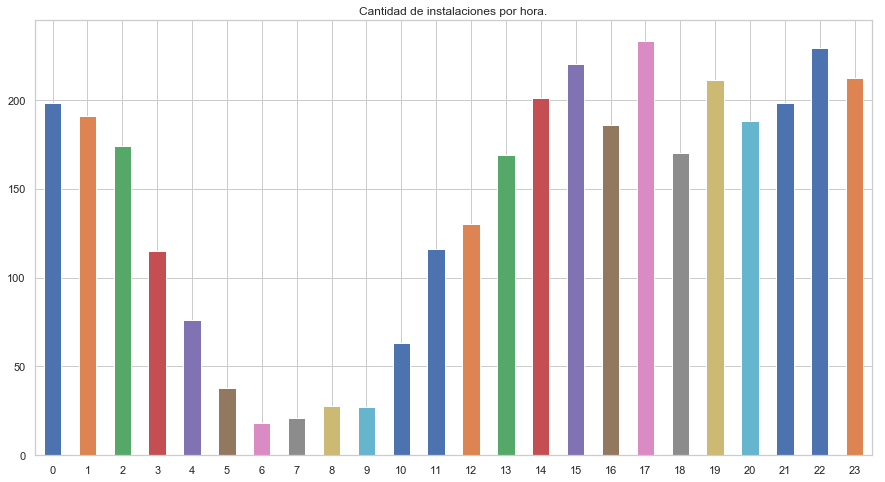

In [29]:
installs['Hour'].value_counts().sort_index().plot(figsize=(15,8),kind='bar'\
                                                                ,rot=0,\
                                                                title='Cantidad de instalaciones por hora.');

<a id='link_6'></a>
### Analisis por aplicacion

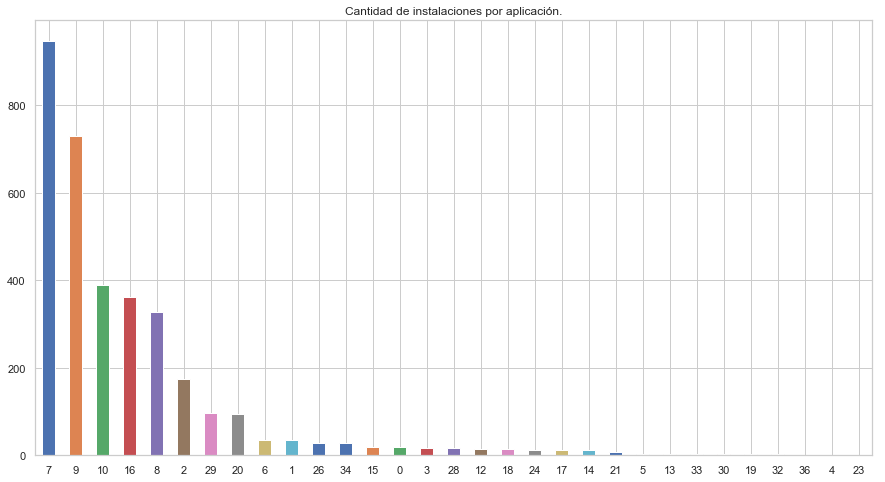

In [33]:
installs['application_id'].value_counts().plot(figsize=(15,8),kind='bar',rot=0,title='Cantidad de instalaciones por aplicación.');

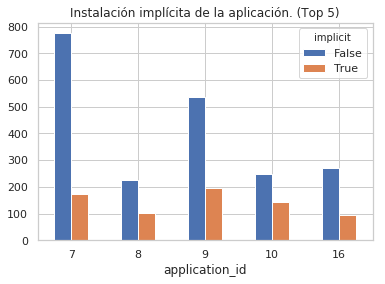

In [27]:
df = installs.loc[installs['application_id'].isin(df.head(5).index)].groupby(['application_id','implicit']).\
    size().reset_index(name='cantidad').set_index('application_id')

df= df.pivot_table(values='cantidad', index=df.index, columns='implicit')

df.plot(kind='bar',rot=0,title='Instalación implícita de la aplicación. (Top 5)');

<a id='link_7'></a>
### Instalaciones wifi

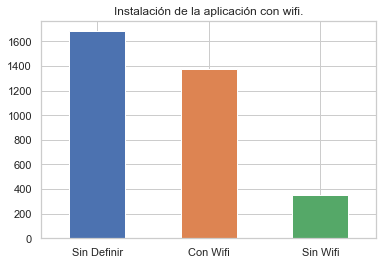

In [35]:
installs['Wifi_cat'].value_counts().plot(kind='bar',rot=0,title='Instalación de la aplicación con wifi.');
plt.xlabel('');

<a id='link_8'></a>
### En que dispositivos se realiza la mayor cantidad de subastas

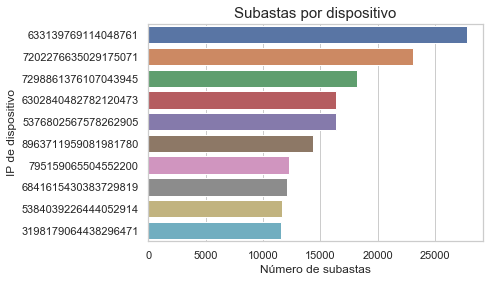

In [36]:
g = sns.barplot(x=auctions['device_id'].value_counts().head(10).values, 
                y=auctions['device_id'].value_counts().head(10).index, 
                order=auctions['device_id'].value_counts().head(10).index,orient='h')
g.set_title("Subastas por dispositivo", fontsize=15)
g.set_xlabel("Número de subastas", fontsize=12)
g.set_ylabel("IP de dispositivo", fontsize=12);

<a id='link_9'></a>
### Cantidad de subastas realizadas dependiendo la hora

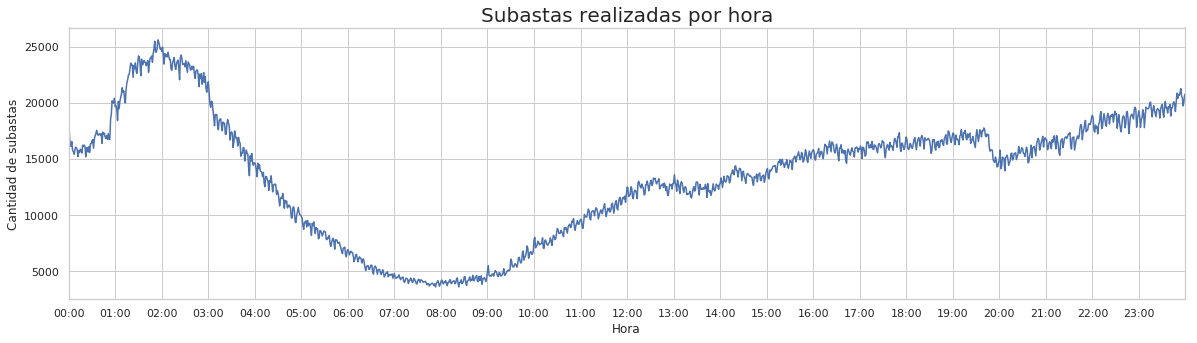

In [30]:
auctions["date"].dt.round("min").dt.time.value_counts().sort_index().plot(kind='line',figsize=(20,5), grid=True);
horas = [datetime.time(i) for i in range(24)]
plt.title("Subastas realizadas por hora", size=20);
plt.xticks(horas);
plt.xlabel("Hora");
plt.ylabel("Cantidad de subastas");

<a id='link_10'></a>
### Cantidad de instalaciones por ip

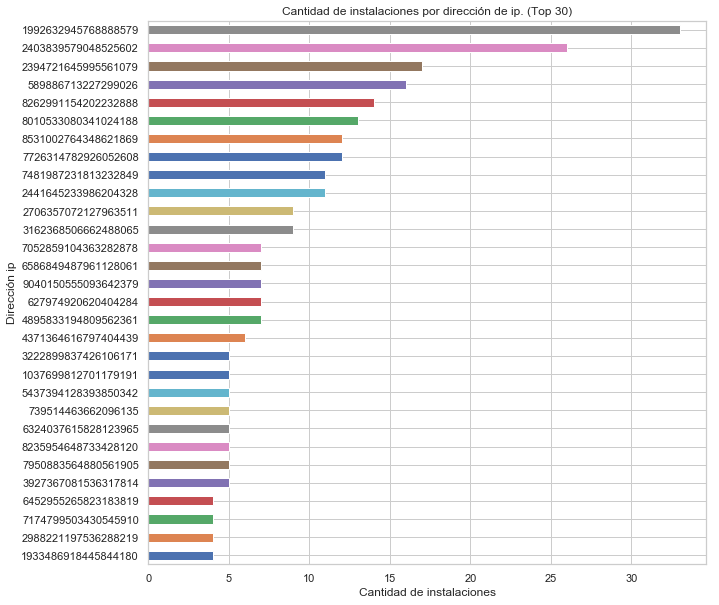

In [38]:
installs['ip_address'].value_counts().head(30).sort_values().plot(figsize=(10,10),kind='barh',rot=0,\
                 title='Cantidad de instalaciones por dirección de ip. (Top 30)');
plt.xlabel('Cantidad de instalaciones');
plt.ylabel('Dirección ip');

<a id='link_11'></a>
### Cantidad de clicks por tiempo de click

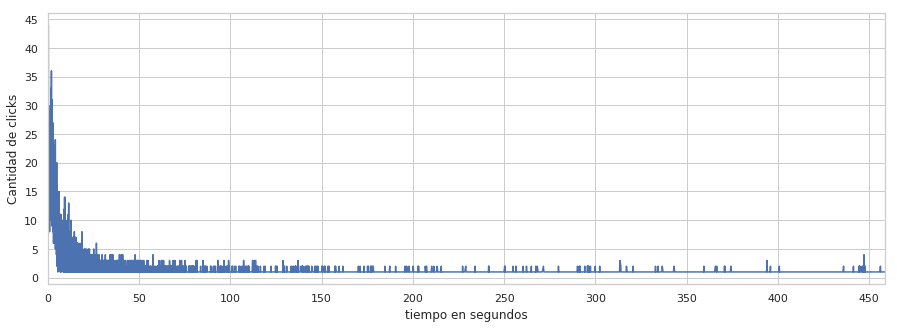

In [33]:
clicks['timeToClick'].round(2).value_counts().sort_index().head(7600).plot(kind='line',figsize=(15,5));
plt.xticks([50 * i for i in range(10)]);
plt.yticks([5*i for i in range(10)]);
plt.xlabel("tiempo en segundos");
plt.ylabel("Cantidad de clicks");

<a id='link_12'></a>
### Versión del SO del dispositivo y la cantidad de eventos que se realizan segun la version

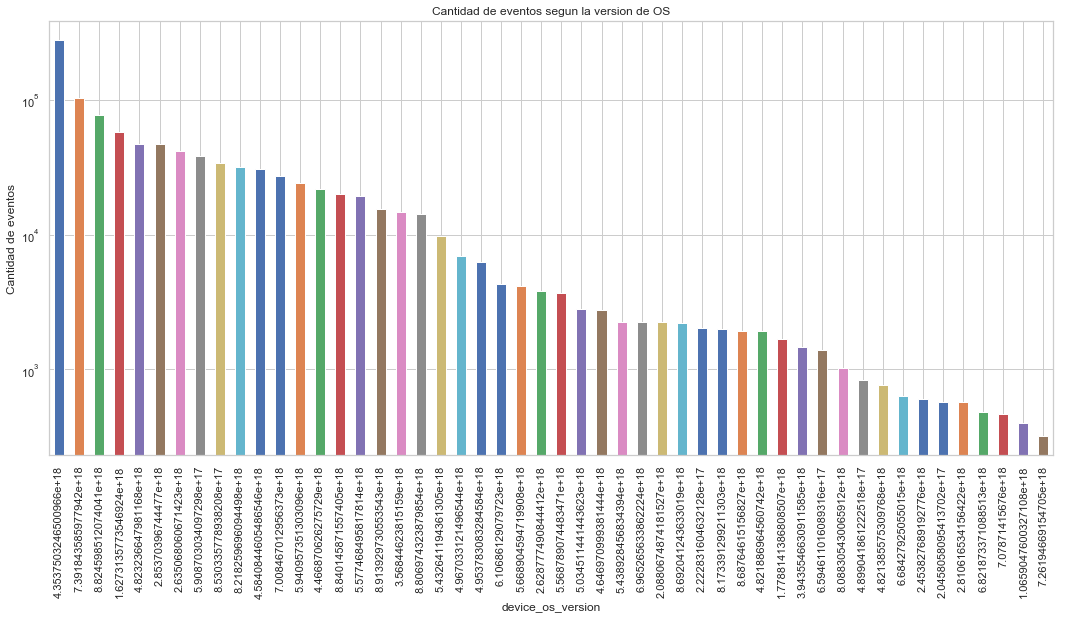

In [53]:
events['device_os_version'].value_counts().head(50).plot(kind='bar',logy=True,figsize=(18,8),\
    title='Cantidad de eventos segun la version de OS')
plt.xlabel('device_os_version')
plt.ylabel('Cantidad de eventos');

<a id='link_13'></a>
### Publicidades de Google vs Apple

In [36]:
events['ref_type'].isnull().sum()

0

In [37]:
events['ref_type'].value_counts()

1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

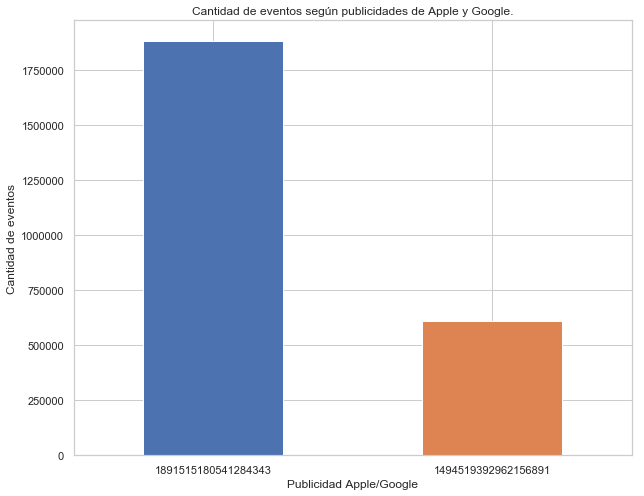

In [60]:
events['ref_type'].value_counts().plot(figsize=(10,8),kind='bar',rot=0,\
    title='Cantidad de eventos según publicidades de Apple y Google.')
plt.xlabel('Publicidad Apple/Google')
plt.ylabel('Cantidad de eventos');

<a id='link_14'></a>
### Análisis de los horarios en eventos

In [5]:
events['Week_day'] = events['date'].dt.day_name().astype('category')
events['Year'] = events['date'].dt.year.astype('category')
events['Month'] = events['date'].dt.month.astype('category')
events['Hour'] = events['date'].dt.hour.astype('int8')

In [6]:
df = events[['Week_day','Hour']].groupby(['Week_day','Hour']).size().reset_index(name='cantidad')\
    .set_index('Week_day')

df = df.pivot_table(values='cantidad', index=df.index, columns='Hour').fillna(value=0)

In [7]:
df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Friday,27825,20142,16088,11611,6286,4547,2945,2230,2106,3398,...,11625,15012,15810,15707,14413,13757,15279,15491,16681,20407
Monday,18805,17971,14027,10187,7767,4058,3548,2836,2780,3866,...,10642,13347,17992,15145,13704,12852,14009,15775,16044,17865
Saturday,21582,18546,15396,12692,9531,6824,4067,3437,3864,4232,...,10831,14190,16619,17103,15851,14353,14978,15632,17245,19641
Sunday,22008,18819,16854,12929,10394,8166,6868,4674,4129,3889,...,11392,13005,14781,16018,16255,16025,14702,17495,18194,20275
Thursday,18010,15233,14445,11240,6789,4128,2593,1800,2566,3240,...,10745,13255,14379,12971,11740,13919,14714,14433,15976,21370


In [10]:
df = pd.merge(days, df, on='Week_day', how='left')
df = df.set_index('Week_day')

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Monday,18805,17971,14027,10187,7767,4058,3548,2836,2780,3866,...,10642,13347,17992,15145,13704,12852,14009,15775,16044,17865
Tuesday,35015,33823,28432,21903,14189,9217,5842,4180,4101,6221,...,22335,29365,29984,29761,28090,28859,29926,35432,37017,38296
Wednesday,37827,34754,28649,21907,14071,10021,6432,4466,4530,8053,...,23882,36018,30834,28463,27003,27090,30151,28437,33117,37860
Thursday,18010,15233,14445,11240,6789,4128,2593,1800,2566,3240,...,10745,13255,14379,12971,11740,13919,14714,14433,15976,21370
Friday,27825,20142,16088,11611,6286,4547,2945,2230,2106,3398,...,11625,15012,15810,15707,14413,13757,15279,15491,16681,20407


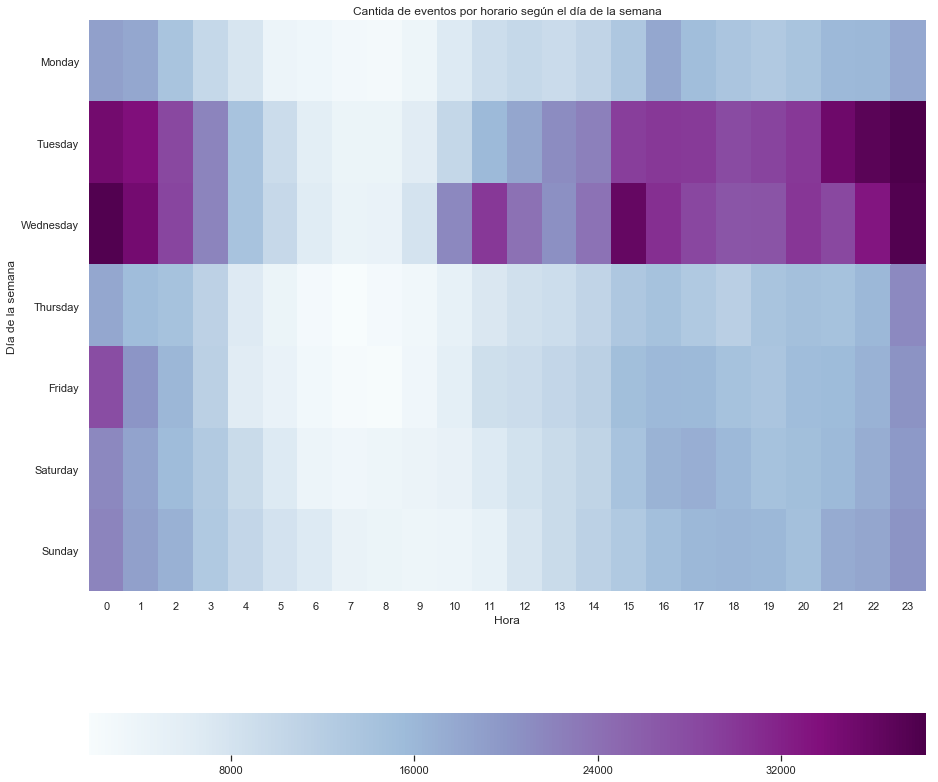

In [12]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df,ax=ax,cmap="BuPu",cbar_kws={"orientation": "horizontal"});
plt.yticks(rotation=0);
plt.xlabel('Hora');
plt.ylabel('Día de la semana');
plt.title('Cantida de eventos por horario según el día de la semana');

Vemos que el resultado es <b>muy similar</b> al que nos dió cuando se analizó el horario para las instalaciones. <b>Puede deberse a que las instalaciones se registran como un evento ?</b>

In [13]:
events['Month'].value_counts()

3    2494423
Name: Month, dtype: int64

<b>Nota:</b> En el set de datos dado, solo se tiene información del mes de Marzo.

In [14]:
events['Year'].value_counts()

2019    2494423
Name: Year, dtype: int64

<b>Nota:</b> En el set de datos dado, solo se tiene información del mes de Marzo.

In [15]:
del events['Year']
del events['Month']

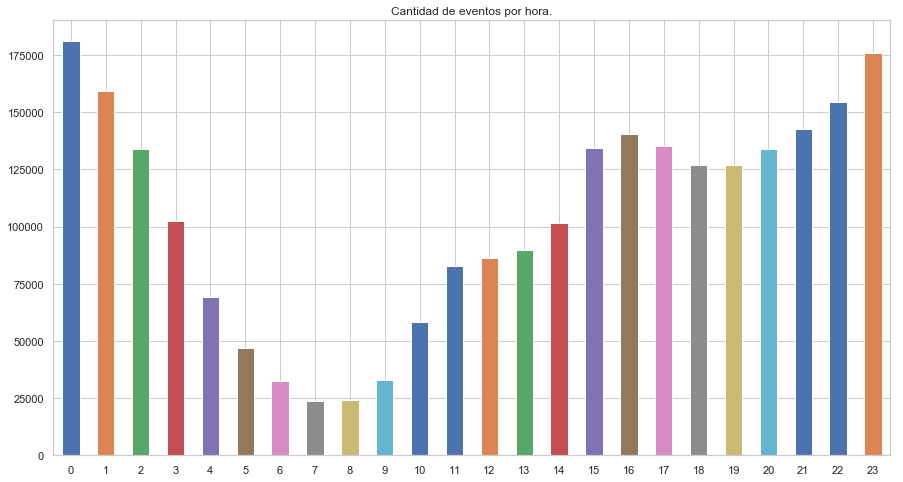

In [17]:
events['Hour'].value_counts().sort_index().plot(figsize=(15,8),kind='bar'\
                                                                ,rot=0,\
                                                                title='Cantidad de eventos por hora.');

Vemos que el resultado es <b>muy similar</b> al que nos dió cuando se analizó el horario para las instalaciones. <b>Puede deberse a que las instalaciones se registran como un evento ?</b>

<a id='link_15'></a>
### Cuantos de estos eventos se le atribuyen a Jampp

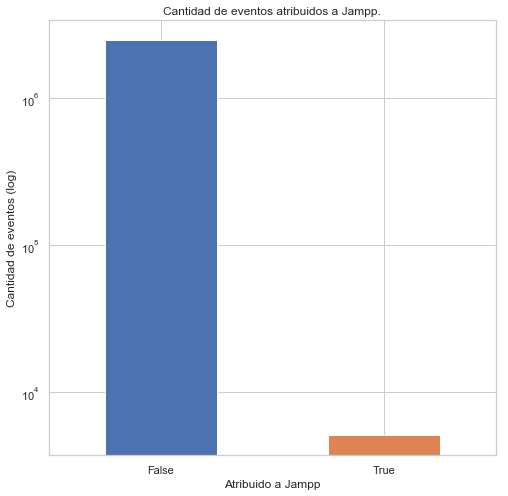

In [21]:
events['attributed'].value_counts()\
    .plot(figsize=(8,8),kind='bar'\
    ,rot=0,logy=True,\
    title='Cantidad de eventos atribuidos a Jampp.')
plt.ylabel('Cantidad de eventos (log)')
plt.xlabel('Atribuido a Jampp');

<a id='link_16'></a>
### Top 10 ciudades con mas eventos

In [51]:
events['device_city'].isnull().sum()

1879725

In [52]:
events['device_city'].dtypes

dtype('float64')

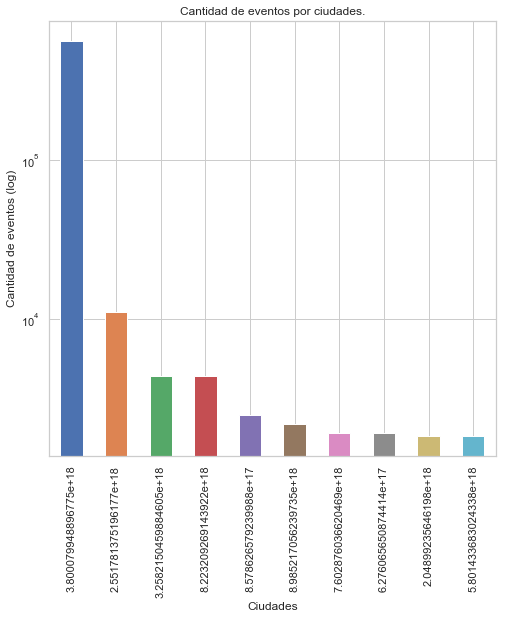

In [22]:
events['device_city'].value_counts().head(10)\
    .plot(figsize=(8,8),kind='bar'\
    ,rot=90,logy=True,\
    title='Cantidad de eventos por ciudades.')
plt.ylabel('Cantidad de eventos (log)')
plt.xlabel('Ciudades');

El valor -1 representa a todos los registros que no tienen información de la ciudad

<a id='link_17'></a>
### Comparación ciudades con mas eventos.

Los siguientes análisis se hacen con las siguientes dos ciudades(string hasheado) con mas cantidad de eventos.
- 3.800080
- 2.551781

In [55]:
ciudades = events.groupby('device_city').size().reset_index(name='cantidad')\
    .sort_values(by='cantidad',ascending=False).head(3).reset_index()['device_city']

ciudad_1 = ciudades[1]
ciudad_2 = ciudades[2]

In [56]:
df = events.loc[events['device_city'].isin([ciudad_1,ciudad_2])]

In [57]:
df1 = df.loc[df['device_city']==ciudad_1]\
    .groupby(['Week_day','Hour']).size().reset_index(name='cantidad').set_index('Week_day')

df2 = df.loc[df['device_city']==ciudad_2]\
    .groupby(['Week_day','Hour']).size().reset_index(name='cantidad').set_index('Week_day')

df1 = df1.pivot_table(values='cantidad', index=df1.index, columns='Hour').fillna(value=0)
df2 = df2.pivot_table(values='cantidad', index=df2.index, columns='Hour').fillna(value=0)

df1 = pd.merge(days, df1, on='Week_day', how='left')
df1 = df1.set_index('Week_day')
df2 = pd.merge(days, df2, on='Week_day', how='left')
df2 = df2.set_index('Week_day')

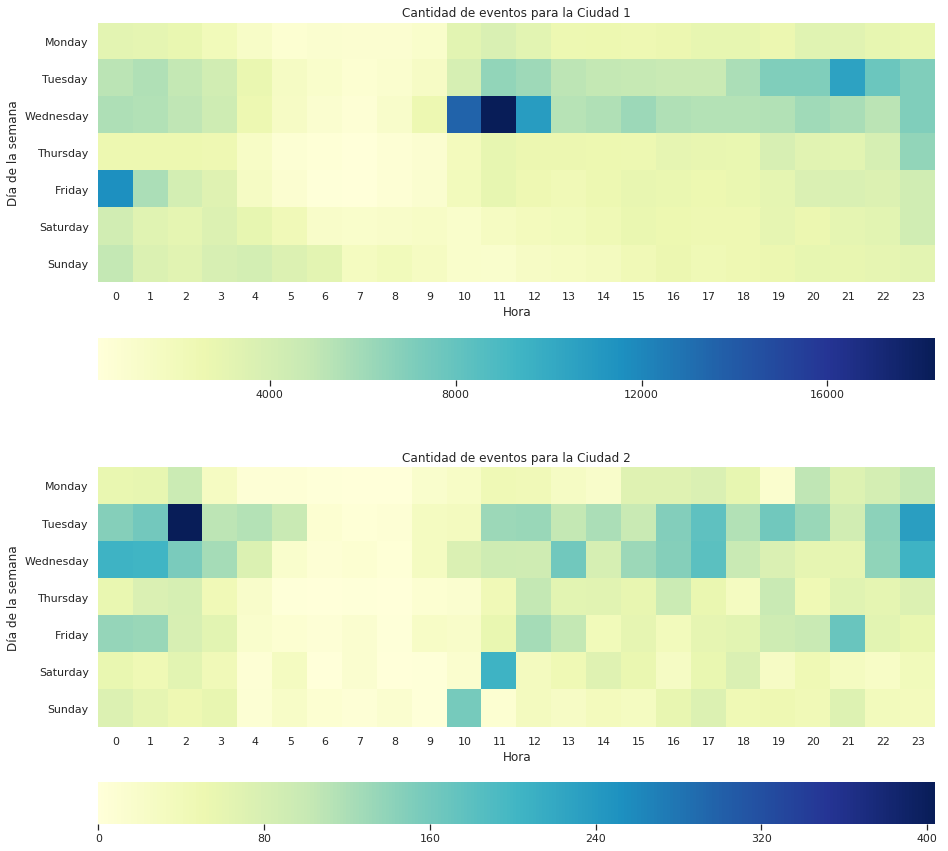

In [58]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.heatmap(df1,ax=ax1,cmap="YlGnBu",cbar_kws={"orientation": "horizontal"});
sns.heatmap(df2,ax=ax2,cmap="YlGnBu",cbar_kws={"orientation": "horizontal"});
plt.yticks(rotation=0);
ax1.set_xlabel('Hora')
ax2.set_xlabel('Hora')
ax1.set_ylabel('Día de la semana')
ax2.set_ylabel('Día de la semana')
ax1.set_title('Cantidad de eventos para la Ciudad 1')
ax2.set_title('Cantidad de eventos para la Ciudad 2');

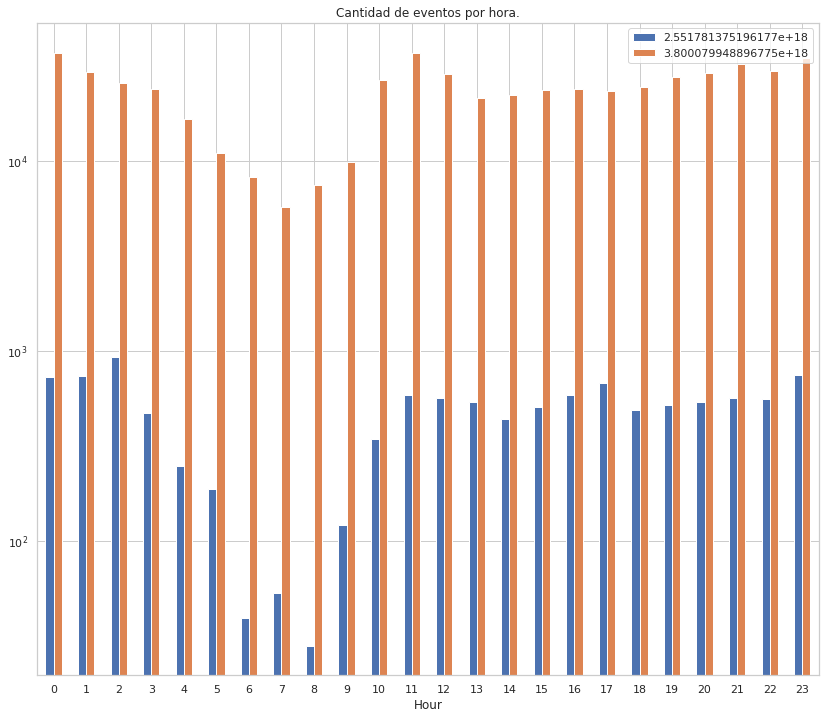

In [59]:
df = df.groupby(['device_city','Hour']).size().reset_index(name='cantidad').set_index(['device_city','Hour'])\
    .unstack()

df.columns = df.columns.droplevel()
ax =df.T.plot(figsize=(14,12),kind='bar'\
    ,rot=0,logy=True,\
    title='Cantidad de eventos por hora.');

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best');

<a id='link_18'></a>
### Publicidades con más click's

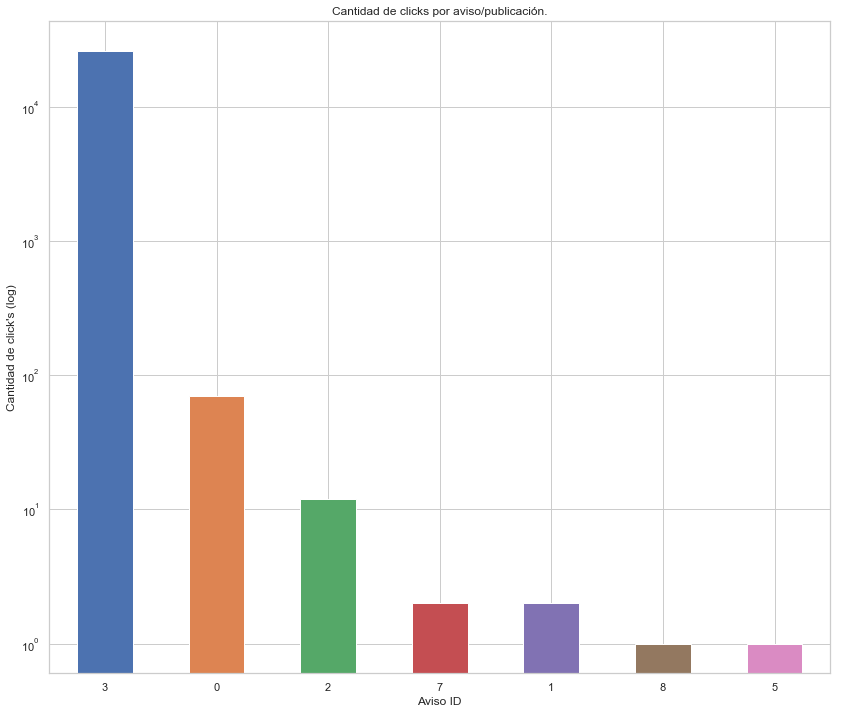

In [25]:
clicks['advertiser_id'].value_counts()\
    .plot(figsize=(14,12),kind='bar'\
    ,rot=0,logy=True,\
    title='Cantidad de clicks por aviso/publicación.');

plt.xlabel('Aviso ID')
plt.ylabel('Cantidad de click\'s (log)');

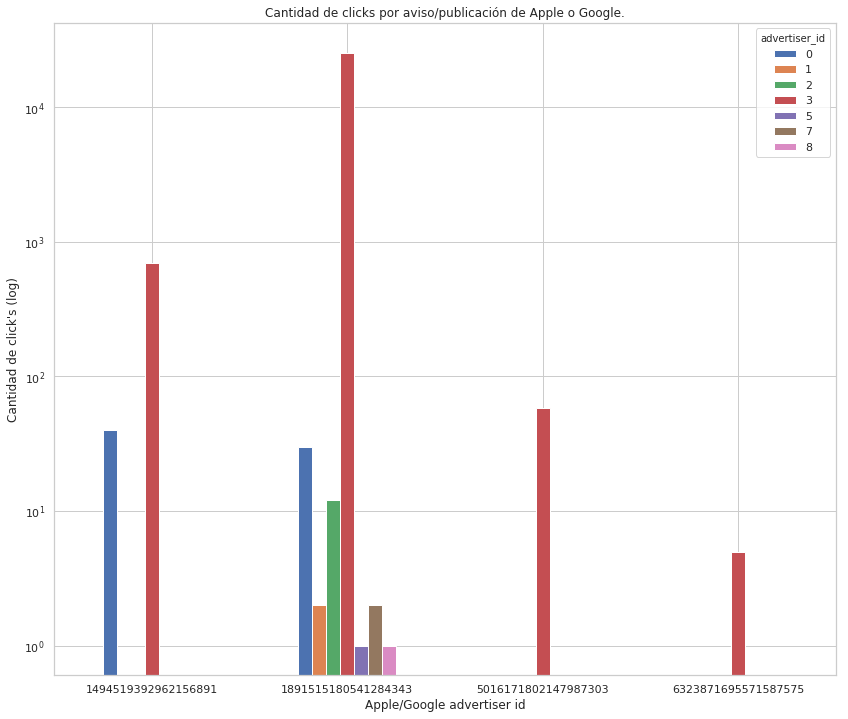

In [117]:
df =clicks.groupby(['ref_type','advertiser_id']).size().reset_index(name='cantidad')\
    .set_index(['ref_type','advertiser_id']).unstack()

df.columns = df.columns.droplevel()
df.fillna(value=0,inplace=True)
df.plot(figsize=(14,12),kind='bar'\
    ,rot=0,logy=True,\
    title='Cantidad de clicks por aviso/publicación de Apple o Google.');

plt.xlabel('Apple/Google advertiser id')
plt.ylabel('Cantidad de click\'s (log)');

<a id='link_19'></a>
### Publicidades con más instalaciones

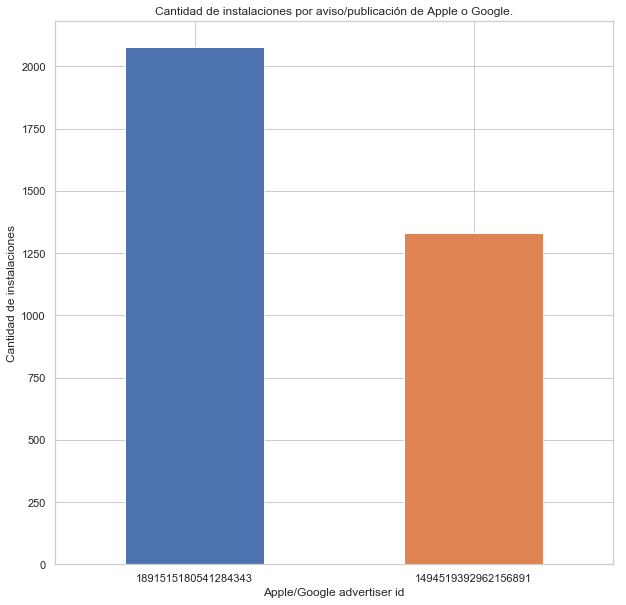

In [26]:
installs['ref_type'].value_counts()\
    .plot(figsize=(10,10),kind='bar'\
    ,rot=0,\
    title='Cantidad de instalaciones por aviso/publicación de Apple o Google.');

plt.xlabel('Apple/Google advertiser id')
plt.ylabel('Cantidad de instalaciones');

### event_uuid --> installs

Vinculando los eventos con las instalaciones por el event_uuid --> Encontramos que hay muchos eventos con instalaciones asociadas que no poseen el mismo ip , a que se podria deber esto?  

Si no se vincula con una misma ip.. que es ? 

In [79]:
aux = pd.merge(events,installs,left_on=['event_uuid','date','ip_address'],\
               right_on=['event_uuid','created','ip_address'],how='inner')

del aux['device_countrycode_x']
del aux['device_countrycode_y']
del aux['ref_type_y']
del aux['ref_hash_y']

aux['ref_hash'] = aux['ref_hash_x']
del aux['ref_hash_x']

aux['ref_type'] = aux['ref_type_x']
del aux['ref_type_x']

In [80]:
aux.head()

,date,event_id,ref_type_x,ref_hash_x,application_id_x,attributed_x,device_countrycode_x,device_os_version,device_brand_x,device_model_x,...,device_countrycode_y,device_brand_y,device_model_y,session_user_agent_y,user_agent_y,kind_y,device_language_y,Wifi_cat_y,Week_day_y,Hour_y
0,2019-03-10 22:24:56.684,31,1891515180541284343,8355110941557237501,0,False,6333597102633388268,7.391844e+18,1.083369e+18,7.876612e+18,...,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,Open,3.301378e+18,Sin Definir,Sunday,22
1,2019-03-11 21:21:05.855,31,1891515180541284343,1670430602051291592,0,False,6333597102633388268,8.218260e+18,1.083369e+18,7.551685e+17,...,6333597102633388268,1.083369e+18,7.551685e+17,HasOffers Mobile AppTracking v1.0,NaN,Open,3.301378e+18,Sin Definir,Monday,21
2,2019-03-11 03:47:22.802,31,1891515180541284343,4306303321567254439,0,False,6333597102633388268,8.824599e+18,3.083059e+17,9.179743e+18,...,6333597102633388268,3.083059e+17,9.179743e+18,HasOffers Mobile AppTracking v1.0,NaN,Open,4.073835e+18,Sin Definir,Monday,3
3,2019-03-13 04:20:57.666,31,1891515180541284343,7953318831018100268,0,False,6333597102633388268,2.635068e+18,5.137992e+17,6.026543e+18,...,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,Open,3.301378e+18,Sin Definir,Wednesday,4
4,2019-03-07 19:58:07.147,1,1891515180541284343,7160601647550560784,7,False,6333597102633388268,4.466871e+18,NaN,8.656854e+18,...,2970470518450881158,NaN,8.656854e+18,adjust.com,NaN,app_open,3.301378e+18,Sin Definir,Thursday,19


In [82]:
aux.shape

(859, 39)

In [83]:
aux['ref_type_x'].value_counts()

1891515180541284343    480
1494519392962156891    379
Name: ref_type_x, dtype: int64

In [84]:
aux['ref_type_y'].value_counts()

1891515180541284343    480
1494519392962156891    379
Name: ref_type_y, dtype: int64

In [123]:
aux.columns

Index(['date', 'event_id', 'ref_type_x', 'ref_hash_x', 'application_id_x',
       'attributed_x', 'device_countrycode_x', 'device_os_version',
       'device_brand_x', 'device_model_x', 'device_city',
       'session_user_agent_x', 'user_agent_x', 'event_uuid', 'carrier',
       'kind_x', 'device_os', 'connection_type', 'ip_address',
       'device_language_x', 'Wifi_cat_x', 'Week_day_x', 'Hour_x', 'created',
       'application_id_y', 'ref_type_y', 'ref_hash_y', 'attributed_y',
       'implicit', 'device_countrycode_y', 'device_brand_y', 'device_model_y',
       'session_user_agent_y', 'user_agent_y', 'kind_y', 'device_language_y',
       'Wifi_cat_y', 'Week_day_y', 'Hour_y'],
      dtype='object')